In [425]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import linear_model
import warnings

warnings.WarningMessage
warnings.filterwarnings("ignore")

In [426]:
data = sns.load_dataset("tips")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [428]:
features = data[["total_bill"]] # use a source to predict, in a variable called features
tip = data["tip"] # predict the tip column


f = linear_model.LinearRegression(fit_intercept = False) # Initiate Linea Model object, the model uses an intercept of 0.0
f.fit(features, tip) # the model is fit, and use features as an input to predict the target(tip column)

LinearRegression(fit_intercept=False)

In [429]:
f.predict([[100]]) # Train the model, make predictions with the model( a bunch of people with a bill of $100 for the table )

array([14.37318953])

In [430]:
#add predictions to dataframe
data["prediction"] = f.predict(data[["total_bill"]]) # train the model

In [431]:
data.head(30)

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367
5,25.29,4.71,Male,No,Sun,Dinner,4,3.634980
6,8.77,2.00,Male,No,Sun,Dinner,2,1.260529
7,26.88,3.12,Male,No,Sun,Dinner,4,3.863513
8,15.04,1.96,Male,No,Sun,Dinner,2,2.161728
9,14.78,3.23,Male,No,Sun,Dinner,2,2.124357


In [432]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['tip'], mode = "markers", name = "actual"))
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['prediction'], mode = "lines", name = "predicted"))
fig.update_layout(font_size = 20)

### A red line has two key properties
#####  intercept
#####  slope
ig.update_layout(font_size = 20)
### Y = intercept + slop * X
##### y = 0.1437 * x

In [433]:
f.coef_ # zero, slope

array([0.1437319])

In [434]:
# a zero intercept   LinearRegression(fit_intercept = False)
f.intercept_

0.0

In [435]:
f_w_int = linear_model.LinearRegression(fit_intercept = True)   # Model without a zero intercept
f_w_int.fit(features, tip)  #Train or fit the model, before making predictions

LinearRegression()

In [436]:
f_w_int.predict([[100]])

array([11.42272135])

In [437]:
f_w_int.predict([[0]]) # table has a bill of $0, in house table

array([0.92026961])

In [438]:
f.predict([[100]])  # table has $100 bill

array([14.37318953])

### simple linear regression - ordinary least squares (OLS)
##### A line has two key properties; 
#####  intercept
#####  slope
#### y = intersept + slope * x = 0.92 + 10.5 * x
##### where y is the tip and x is the total bill

In [439]:
f_w_int.coef_ # no zero, slope

array([0.10502452])

###### simple linear regression - ordinary least squares (OLS)

In [440]:
data['prediction_with_intercept'] = f_w_int.predict(data[["total_bill"]])
data.head()

,total_bill,tip,sex,smoker,day,time,size,prediction,prediction_with_intercept
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,3.502822


In [441]:
#get coefficient and intercept for new model
f_w_int.coef_, f_w_int.intercept_

(array([0.10502452]), 0.9202696135546731)

In [442]:
#data['prediction_with_intercept'] = f_w_int.predict(data[["total_bill"]])
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['tip'], mode = "markers", name = "actual"))
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['prediction'], mode = "lines", name = "prediction (b = 0)"))
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['prediction_with_intercept'], mode = "lines", name = "predicted (b ≠ 0)"))
fig.update_layout(font_size = 20)

### Using Plotly

In [443]:
#create the plot
fig = px.scatter(data, x = "total_bill", y = "tip", trendline = "ols", trendline_color_override="red")
fig.update_layout(font_size = 20)

In [444]:
#get the model parameters
fig = px.scatter(data, x = "total_bill", y = "tip", trendline = "ols", trendline_color_override="red")
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].params


array([0.92026961, 0.10502452])

## Loss Functions

### Computing the L2 Loss and MSE

In [445]:
data = sns.load_dataset("tips")
data["prediction"] = f.predict(data[["total_bill"]])
data.head(50)

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367
5,25.29,4.71,Male,No,Sun,Dinner,4,3.634980
6,8.77,2.00,Male,No,Sun,Dinner,2,1.260529
7,26.88,3.12,Male,No,Sun,Dinner,4,3.863513
8,15.04,1.96,Male,No,Sun,Dinner,2,2.161728
9,14.78,3.23,Male,No,Sun,Dinner,2,2.124357


In [446]:
# add loss to the dataframe
data["L2_loss"] = (data["prediction"] - data["tip"])**2
data.head(30)

,total_bill,tip,sex,smoker,day,time,size,prediction,L2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,2.050638
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,0.030211
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,0.230585
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,0.008756
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,0.005720
5,25.29,4.71,Male,No,Sun,Dinner,4,3.634980,1.155669
6,8.77,2.00,Male,No,Sun,Dinner,2,1.260529,0.546818
7,26.88,3.12,Male,No,Sun,Dinner,4,3.863513,0.552812
8,15.04,1.96,Male,No,Sun,Dinner,2,2.161728,0.040694
9,14.78,3.23,Male,No,Sun,Dinner,2,2.124357,1.222446


In [447]:
#compute the mean
np.mean(data["L2_loss"])

1.178116115451317

In [448]:
data["L2_loss"].mean()

1.178116115451317

In [449]:
## or we can compute MSE directly from the outcome and predictions using mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(data["tip"], data["prediction"])

1.178116115451317

### Optimizing the MSE

In [450]:
data = sns.load_dataset("tips")
data["prediction"] = 0.2 * data["total_bill"]
data["L2_loss"] = (data["tip"] - data["prediction"])**2
data

,total_bill,tip,sex,smoker,day,time,size,prediction,L2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,3.398,5.702544
1,10.34,1.66,Male,No,Sun,Dinner,3,2.068,0.166464
2,21.01,3.50,Male,No,Sun,Dinner,3,4.202,0.492804
3,23.68,3.31,Male,No,Sun,Dinner,2,4.736,2.033476
4,24.59,3.61,Female,No,Sun,Dinner,4,4.918,1.710864
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.806,0.012996
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.436,11.806096
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.534,6.421156
242,17.82,1.75,Male,No,Sat,Dinner,2,3.564,3.290596


In [451]:
mean_squared_error(data["tip"], data["prediction"])

2.667486278688525

We can compute the MSE for various values of theta.

In [452]:
## error assuming 20% tip
mean_squared_error(data['tip'], data['total_bill']*0.2)

2.667486278688525

In [453]:
## error assuming 10% tip
mean_squared_error(data['tip'], data['total_bill']*0.1)

2.0777683729508194

In [454]:
## error assuming 13% tip
mean_squared_error(data['tip'], data['total_bill']*0.13)

1.2668192650409837

In [455]:
mean_squared_error(data['tip'], data['total_bill']*0.14)

1.18466755852459

In [456]:
# define a function mse_given_theta as a function which takes theta
# and computes RMSE
def mse_given_theta(theta):
    return mean_squared_error(data["tip"], data["total_bill"]*theta)

In [457]:
mse_given_theta(0.145)

1.178872579538934

In [458]:
# compute MSEs for various thetas
thetas = np.linspace(0.1, 0.2, 100)
thetas

array([0.1       , 0.1010101 , 0.1020202 , 0.1030303 , 0.1040404 ,
       0.10505051, 0.10606061, 0.10707071, 0.10808081, 0.10909091,
       0.11010101, 0.11111111, 0.11212121, 0.11313131, 0.11414141,
       0.11515152, 0.11616162, 0.11717172, 0.11818182, 0.11919192,
       0.12020202, 0.12121212, 0.12222222, 0.12323232, 0.12424242,
       0.12525253, 0.12626263, 0.12727273, 0.12828283, 0.12929293,
       0.13030303, 0.13131313, 0.13232323, 0.13333333, 0.13434343,
       0.13535354, 0.13636364, 0.13737374, 0.13838384, 0.13939394,
       0.14040404, 0.14141414, 0.14242424, 0.14343434, 0.14444444,
       0.14545455, 0.14646465, 0.14747475, 0.14848485, 0.14949495,
       0.15050505, 0.15151515, 0.15252525, 0.15353535, 0.15454545,
       0.15555556, 0.15656566, 0.15757576, 0.15858586, 0.15959596,
       0.16060606, 0.16161616, 0.16262626, 0.16363636, 0.16464646,
       0.16565657, 0.16666667, 0.16767677, 0.16868687, 0.16969697,
       0.17070707, 0.17171717, 0.17272727, 0.17373737, 0.17474

In [459]:
mses = [mse_given_theta(theta) for theta in thetas]
mses

[2.0777683729508194,
 2.0366887534058913,
 1.996569059699077,
 1.9574092918303747,
 1.919209449799786,
 1.8819695336073097,
 1.8456895432529465,
 1.8103694787366964,
 1.7760093400585586,
 1.7426091272185338,
 1.7101688402166224,
 1.678688479052823,
 1.6481680437271375,
 1.6186075342395636,
 1.5900069505901033,
 1.5623662927787565,
 1.5356855608055218,
 1.5099647546704,
 1.4852038743733909,
 1.461402919914495,
 1.4385618912937121,
 1.4166807885110417,
 1.3957596115664843,
 1.37579836046004,
 1.3567970351917082,
 1.3387556357614898,
 1.3216741621693837,
 1.3055526144153906,
 1.2903909924995107,
 1.2761892964217436,
 1.262947526182089,
 1.2506656817805475,
 1.2393437632171185,
 1.2289817704918033,
 1.2195797036046003,
 1.2111375625555103,
 1.2036553473445333,
 1.197133057971669,
 1.1915706944369175,
 1.1869682567402793,
 1.1833257448817533,
 1.1806431588613406,
 1.1789204986790405,
 1.1781577643348538,
 1.1783549558287796,
 1.1795120731608182,
 1.18162911633097,
 1.1847060853392344,
 1.18

In [460]:
fig = px.line(x = thetas, y = mses)
fig.update_layout(
    xaxis_title = "θ",
    yaxis_title = "MSE",
    font_size = 20
)
fig.show()

## Minimizing a Function Using Scipy Optimize

In [461]:
import scipy.optimize

In [462]:
def g(x):
    return x**3 + x**2 - 3*x + 2

In [463]:
g(0)

2

In [464]:
g(0.1)

1.7109999999999999

In [465]:

# Failure
scipy.optimize.minimize(g, x0 = -5)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1121316614.1754239
        x: [-1.039e+03]
      nit: 1
      jac: [ 3.238e+06]
 hess_inv: [[-3.194e-04]]
     nfev: 236
     njev: 112

In [466]:
# Success
scipy.optimize.minimize(mse_given_theta, x0 = 3)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1781161154513435
        x: [ 1.437e-01]
      nit: 3
      jac: [ 0.000e+00]
 hess_inv: [[ 1.063e-03]]
     nfev: 8
     njev: 4

### Mean Absolute Error ( MAE )
$${\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}}$$

$$y = 4.2x + \sigma$$

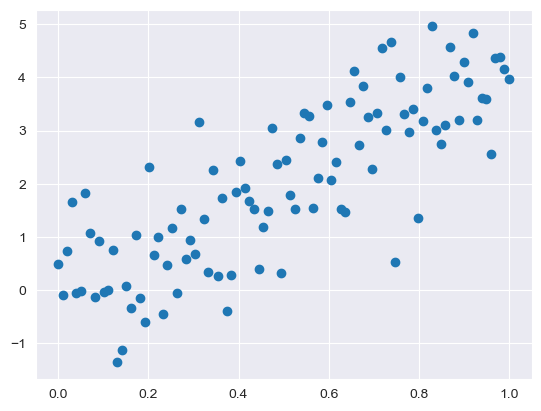

In [467]:
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(0, 1, 100)
y = 4.2*x + np.random.normal(size = 100)
plt.scatter(x, y)

In [468]:
def mae_loss(theta):
    return np.mean(np.abs(y - theta*x))

In [469]:

# value of theta
minimum_theta = scipy.optimize.minimize(mae_loss, x0 = 4)
theta_mae = minimum_theta.x[0]
theta_mae

4.150739192004366

## Multiple Linear Regression

In [470]:
# fit a model on total_bill and size
two_features = data[["total_bill", "size"]]
tip = data["tip"]

f2 = linear_model.LinearRegression(fit_intercept = False)
f2.fit(two_features, tip)

LinearRegression(fit_intercept=False)

In [471]:
#show coefficients
f2.coef_

array([0.1007119 , 0.36209717])

In [472]:
# show intercept - fit_intercept = False
f2.intercept_

0.0

In [473]:
# make a prediction for a table with $10 total bill and 3 people seated
f2.predict([[10, 3]])

array([2.09341054])

In [474]:
data["prediction"] = f.predict(data[["total_bill"]])

In [475]:
data["prediction_2d"] = f2.predict(data[["total_bill", "size"]])
data.head(5)

,total_bill,tip,sex,smoker,day,time,size,prediction,L2_loss,prediction_2d
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,5.702544,2.435290
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,0.166464,2.127653
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,0.492804,3.202249
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,2.033476,3.109052
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,1.710864,3.924894


In [476]:
px.scatter_3d(data, x = "total_bill", y = "size", z = "tip")

In [477]:
# This code is not something we expect you to understand!
# It's just computing predictions for various bills and table sizes
table_bills, table_sizes = np.meshgrid(range(50), range(6))
tip_predictions = ( 0.1007119 * table_bills + 0.3621 * table_sizes)

In [478]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = data["total_bill"], y = data["size"], z = data["tip"], mode = "markers", name = "actual"))
fig.add_trace(go.Surface(x = table_bills, y = table_sizes, z = tip_predictions, name = "predicted"))
fig.show()

In [479]:
mean_squared_error(data["tip"], f.predict(data[["total_bill"]]))

1.178116115451317

In [480]:
mean_squared_error(data["tip"], f2.predict(data[["total_bill", "size"]]))

1.06482122862577

### Using Non-numeric Features

In [481]:
data = sns.load_dataset("tips")
data.iloc[[193, 90, 25, 26, 190], :]

,total_bill,tip,sex,smoker,day,time,size
193,15.48,2.02,Male,Yes,Thur,Lunch,2
90,28.97,3.00,Male,Yes,Fri,Dinner,2
25,17.81,2.34,Male,No,Sat,Dinner,4
26,13.37,2.00,Male,No,Sat,Dinner,2
190,15.69,1.50,Male,Yes,Sun,Dinner,2


In [482]:
# Let's create a copy of the dataset that only has 3 features in order to keep things simple
three_features = ['total_bill', 'size', 'day']

three_feature_data = pd.DataFrame(data[three_features])
three_feature_data.head(5)

,total_bill,size,day
0,16.99,2,Sun
1,10.34,3,Sun
2,21.01,3,Sun
3,23.68,2,Sun
4,24.59,4,Sun


We can achieve our goal by using the pd.get_dummies function.

In [483]:
# let's create "dummies" that represent whether it is thursday, friday, saturday, or sunday
dummies = pd.get_dummies(three_feature_data['day'])
dummies.iloc[[193, 90, 25, 26, 190], :]
#dummies.iloc[[193]]

,Thur,Fri,Sat,Sun
193,True,False,False,False
90,False,True,False,False
25,False,False,True,False
26,False,False,True,False
190,False,False,False,True


In [484]:
dummies = pd.get_dummies(three_feature_data['day']).astype(int)
dummies

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [485]:
dummies = pd.get_dummies(three_feature_data['day']).astype(int)
data_w_dummies = pd.concat([three_feature_data, dummies], axis=1)
data_w_dummies.iloc[[193, 90, 25, 26, 190], :]

,total_bill,size,day,Thur,Fri,Sat,Sun
193,15.48,2,Thur,1,0,0,0
90,28.97,2,Fri,0,1,0,0
25,17.81,4,Sat,0,0,1,0
26,13.37,2,Sat,0,0,1,0
190,15.69,2,Sun,0,0,0,1


In [486]:
data_w_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   size        244 non-null    int64   
 2   day         244 non-null    category
 3   Thur        244 non-null    int32   
 4   Fri         244 non-null    int32   
 5   Sat         244 non-null    int32   
 6   Sun         244 non-null    int32   
dtypes: category(1), float64(1), int32(4), int64(1)
memory usage: 8.2 KB


As you'll see when you run the cell below, the data frame above will cause the linear regression fitter to crash due to the one non-numeric column.

In [487]:
# The code below will crash since data_w_dummies includes a non-numeric feature
f_with_day = linear_model.LinearRegression(fit_intercept=False)
f_with_day.fit(data_w_dummies[['total_bill','size']], tip)

LinearRegression(fit_intercept=False)

In [488]:
data_w_dummies.head(30)

,total_bill,size,day,Thur,Fri,Sat,Sun
0,16.99,2,Sun,0,0,0,1
1,10.34,3,Sun,0,0,0,1
2,21.01,3,Sun,0,0,0,1
3,23.68,2,Sun,0,0,0,1
4,24.59,4,Sun,0,0,0,1
5,25.29,4,Sun,0,0,0,1
6,8.77,2,Sun,0,0,0,1
7,26.88,4,Sun,0,0,0,1
8,15.04,2,Sun,0,0,0,1
9,14.78,2,Sun,0,0,0,1


In [489]:
#drop the non-numeric column
# del data_w_dummies["day"]
data_w_dummies.drop(columns=['day'], inplace=True)
data_w_dummies.head(5)

,total_bill,size,Thur,Fri,Sat,Sun
0,16.99,2,0,0,0,1
1,10.34,3,0,0,0,1
2,21.01,3,0,0,0,1
3,23.68,2,0,0,0,1
4,24.59,4,0,0,0,1


Now that we've dropped the non-numeric data, we can fit our model.

In [490]:
f_with_day = linear_model.LinearRegression(fit_intercept=False)
f_with_day.fit(data_w_dummies, tip)

LinearRegression(fit_intercept=False)

In [491]:
f_with_day.coef_

array([0.09299361, 0.18713231, 0.66829361, 0.74578683, 0.62112858,
       0.73228865])

In [492]:
## Prediction for a party of 3, with a $50 total bill, eating on a thursday
f_with_day.predict([[50, 3, 1, 0, 0, 0]])

array([5.87937107])

In [497]:
## Prediction for a party of 3 with a $50 total bill, eating on a saturday
f_with_day.predict([[50, 3, 0, 0, 1, 0]])

array([5.83220605])

In [498]:
## Prediction for a party of 3 with a $50 total bill, eating on a sunday
f_with_day.predict([[50, 3, 0, 0, 0, 1]])

array([5.94336612])

In [494]:
## Let's compute the MSE
mean_squared_error(data['tip'], f_with_day.predict(data_w_dummies))

1.0121298853078433

In [ ]:
mean_squared_error(data['tip'], f_with_day.predict(data_w_dummies))

### Fitting Multiple Non-Numeric Conditions in Plotly

Rather than fitting a higher dimensional (more parameters) model, we can also sometimes simply build visualizations on specific subpopulations.

In [495]:
px.scatter(data, x = "total_bill", y =  "tip", color = "day", trendline = "ols")